From Kaggle Kernerl: https://www.kaggle.com/manvindra/py-data-processing-visuals/notebook

In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar

## Retrieve the data 

In [2]:
#Load all Files (hey must be in input directory in a brother directory of the notebook)
data_load = {
    'item_categories': pd.read_csv('../input/item_categories.csv'), 
    'items': pd.read_csv('../input/items.csv'), 
    'sales_train': pd.read_csv('../input/sales_train_v2.csv'),
    'sample_submission': pd.read_csv('../input/sample_submission.csv'),
    'shops': pd.read_csv('../input/shops.csv'),
    'test': pd.read_csv('../input/test.csv')
}

### Sales data

In [3]:
# Sales train: sales made during the previous 18 months
data_load['sales_train'].head()
# date: date in dd.mm.YYYY format
# date_bloc_num:  a consecutive month number, used for convenience. \
    # January 2013 is 0, February 2013 is 1,..., October 2015 is 33
# shop_id: shop id, 59 shops
# item_id: item id, 22k references
# item_price: numeric, decimal,between -1 (only one case?) and 307980, average: 890
# item_cont_day: number of products sold (negative in case of return), min: -22, max: 2169, mean: 1.242

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
data_load['sales_train'].describe(include = 'all')
#2.936 Million rows, no missing values

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
unique,1034,NaN,NaN,NaN,NaN,NaN
top,28.12.2013,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,NaN,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,NaN,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,NaN,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00


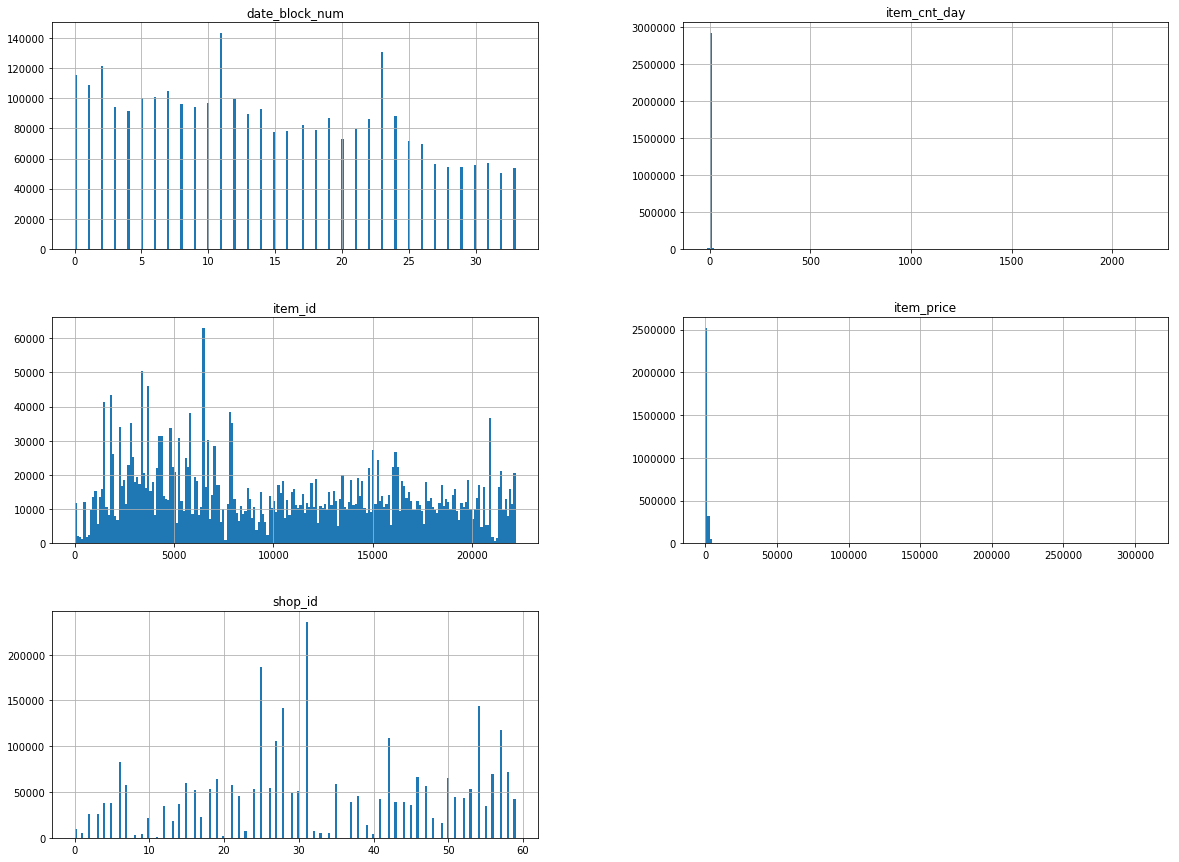

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data_load['sales_train'].hist(bins=200, figsize = (20,15))
plt.show()

#### Focus on item price

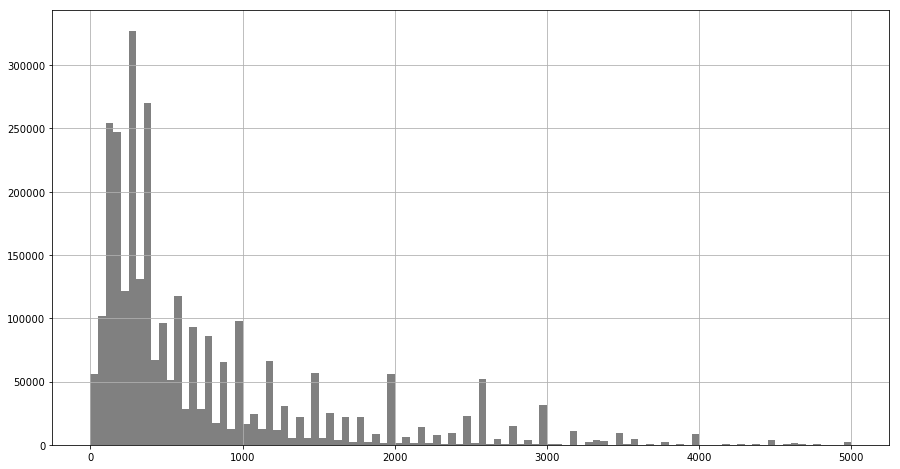

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data_load['sales_train'].item_price.hist(bins = 100, range=[0,5000], facecolor='gray', align='mid', figsize = (15,8))
plt.show()

#### Focus on count per day

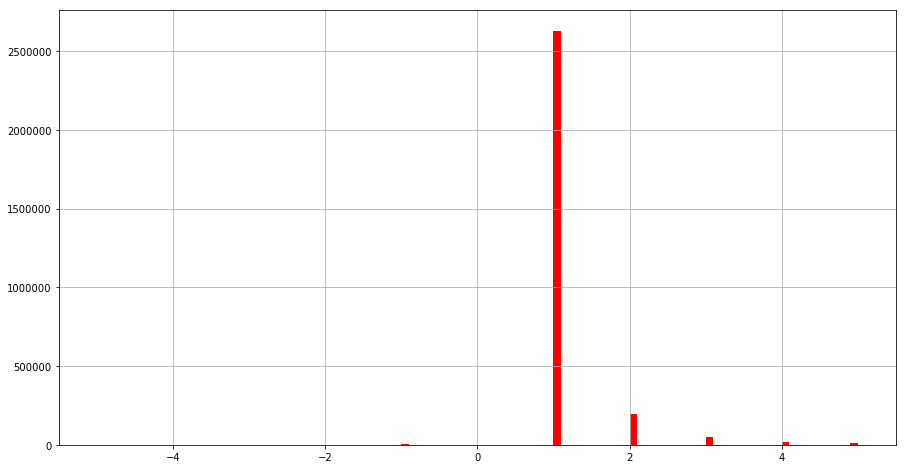

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
data_load['sales_train'].item_cnt_day.hist(bins = 100, range=[-5,5], facecolor='red', align='mid', figsize = (15,8))
plt.show()
#Looks like an exponential decay, on both sides
# There is no value à 0 => shop, item with 0 sale are not returned, but they exist, this are meaningfull data
# We need to add the zero sales in the train set, as they will be in the test set

### Items and item categories

In [8]:
# Items table 
data_load['items'].head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [9]:
data_load['items'].describe()
# item_id: 22170 item references
# item_category_id: 84 item categories
# item_name: in Cyrillic or Latin. Does the * have a meaning?, does the D has a meaning? \
# => Does the text in parenthesis has a meaning?

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [10]:
# Items table 
data_load['item_categories'].head(10)
# The categories seems composite => it could be worth splitting labels to regroup by other categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


#### Shops

In [11]:
# Shop table 
data_load['shops'].head(20)
# The shop name seems to contain the city, we should probably add a column for the city

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


#### Tests and sample submission

In [15]:
# Shop table 
data_load['test'].describe()
# the test set. You need to forecast the sales for these shops and products for November 2015.

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [13]:
# Shop table 
data_load['sample_submission'].head(20)
# the sample submission file in the correct format.

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


### Time series

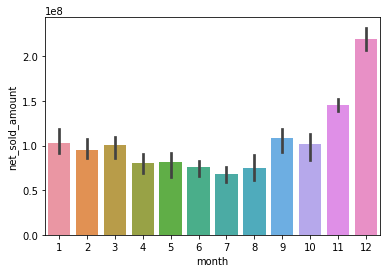

In [14]:
import calendar
import seaborn as sns

# Split the date
transactions = data_load['sales_train']

transactions['date'] = pd.to_datetime(transactions['date'], format = "%d.%m.%Y")

transactions['day'] = transactions['date'].dt.day
transactions['month'] = transactions['date'].dt.month
transactions['year'] = transactions['date'].dt.year

transactions['net_sold_amount'] = transactions.item_price*transactions.item_cnt_day
                                      
y = transactions.groupby(['year', 'month'], as_index=False).net_sold_amount.sum()

sns.barplot(x= 'month', y= 'net_sold_amount', data=y )   


### Comparison test/train/evaluation sets

In [15]:
transactions = data_load['sales_train'].copy()

n_item_train = transactions.item_id.nunique()
items_train = transactions.item_id.unique()
n_item_test = data_load['test'].item_id.nunique()
item_test = data_load['test'].item_id.unique()

print("Unique item id for train: ", n_item_train, 'For test: ', n_item_test)

c=np.intersect1d(items_train,item_test)
len(c)
print("Number of elements of the test set, not in the training set: ", n_item_test-len(c))
# 4737 => 363 items from the test set are not in the train set

test_no_train = np.setxor1d(c,item_test)

# Result:
# Unique item id for train:  21807 For test:  5100
# Number of elements of the test set, not in the training set:  363

Unique item id for train:  21807 For test:  5100
Number of elements of the test set, not in the training set:  363


In [21]:
transactions = data_load['sales_train'].copy()

n_item_train = transactions[data_load['sales_train'].date_block_num <33].item_id.nunique()
items_train = transactions[data_load['sales_train'].date_block_num <33].item_id.unique()
n_item_test = transactions[data_load['sales_train'].date_block_num ==33].item_id.nunique()
item_test = transactions[data_load['sales_train'].date_block_num ==33].item_id.unique()

print("Unique item id for train: ", n_item_train, 'For test: ', n_item_test)

c=np.intersect1d(items_train,item_test)
len(c)
print("Number of elements of the eval set, not in the training set: ", n_item_test-len(c))
# 4737 => 363 items from the test set are not in the train set

test_no_train = np.setxor1d(c,item_test)

# Result:
# Unique item id for train:  21332 For test:  5413
# Number of elements of the eval set, not in the training set:  475

Unique item id for train:  21332 For test:  5413
Number of elements of the eval set, not in the training set:  475


In [16]:
n_shop_test = len(data_load['test'].shop_id.unique())
shop_test = data_load['test'].shop_id.unique()
n_shop_train = len(data_load['sales_train'].shop_id.unique())
shop_train = data_load['sales_train'].shop_id.unique()

print("Unique shop id for train: ", n_shop_train, 'For test: ', n_shop_test)

c=np.intersect1d(shop_test,shop_train)
len(c)

print("Number of shops of the test set, not in the training set: ", n_shop_test-len(c))
# All shops of the test set are in the train set
# We can use all the shops in the train set

Unique shop id for train:  60 For test:  42
Number of shops of the test set, not in the training set:  0


In [17]:
n_shop_eval = len(data_load['sales_train'][data_load['sales_train'].date_block_num ==33].shop_id.unique())
shop_eval = data_load['sales_train'][data_load['sales_train'].date_block_num ==33].shop_id.unique()
n_shop_train = len(data_load['sales_train'][data_load['sales_train'].date_block_num <33].shop_id.unique())
shop_train = data_load['sales_train'].shop_id.unique()

print("Unique shop id for train: ", n_shop_train, 'For eval: ', n_shop_eval)

c=np.intersect1d(shop_eval,shop_eval)
len(c)

print("Number of shops of the eval set, not in the training set: ", n_shop_eval-len(c))
# All shops of the eval set are in the train set
# We can use all the shops in the train set

Unique shop id for train:  59 For eval:  44
Number of shops of the eval set, not in the training set:  0


In [21]:
transactions = data_load['sales_train'].copy()

transactions = transactions.merge(data_load['items'],
                                how = 'left',
                                on = ['item_id']
)

n_item_categories_train = transactions.item_category_id.nunique()
item_categories_train = transactions.item_category_id.unique()

tests = data_load['test'].merge(data_load['items'],
                                how = 'left',
                                on = ['item_id']
)

n_item_categories_test = tests.item_category_id.nunique()
item_categories_test = tests.item_category_id.unique()

print("Unique category ids for train: ", n_item_categories_train, 'For test: ', n_item_categories_test)

c=np.intersect1d(item_categories_train,item_categories_test)
len(c)
print("Number of elements of the test set, not in the training s et: ", n_item_categories_test-len(c))
# 4737 => 363 items# from the test set are not in the train set# 

test_no_train = np.setxor1d(c,item_categories_test)

# Result:
# Unique category ids for train:  84 For test:  62
# Number of elements of the test set, not in the training set:  0

Unique category ids for train:  84 For test:  62
Number of elements of the test set, not in the training set:  0


In [22]:
transactions = data_load['sales_train'][data_load['sales_train'].date_block_num <33].merge(data_load['items'],
                                how = 'left',
                                on = ['item_id']
)

n_item_categories_train = transactions.item_category_id.nunique()
item_categories_train = transactions.item_category_id.unique()

tests = data_load['sales_train'][data_load['sales_train'].date_block_num ==33].merge(data_load['items'],
                                how = 'left',
                                on = ['item_id']
)

n_item_categories_test = tests.item_category_id.nunique()
item_categories_test = tests.item_category_id.unique()

print("Unique category ids for train: ", n_item_categories_train, 'For test: ', n_item_categories_test)

c=np.intersect1d(item_categories_train,item_categories_test)
len(c)
print("Number of elements of the test set, not in the training set: ", n_item_categories_test-len(c))
# 4737 => 363 items# from the test set are not in the train set# 

test_no_train = np.setxor1d(c,item_categories_test)

# Result:
# Unique category ids for train:  84 For test:  62
# Number of elements of the test set, not in the training set:  0

Unique category ids for train:  84 For test:  63
Number of elements of the test set, not in the training s et:  0


#### Scatter matrix

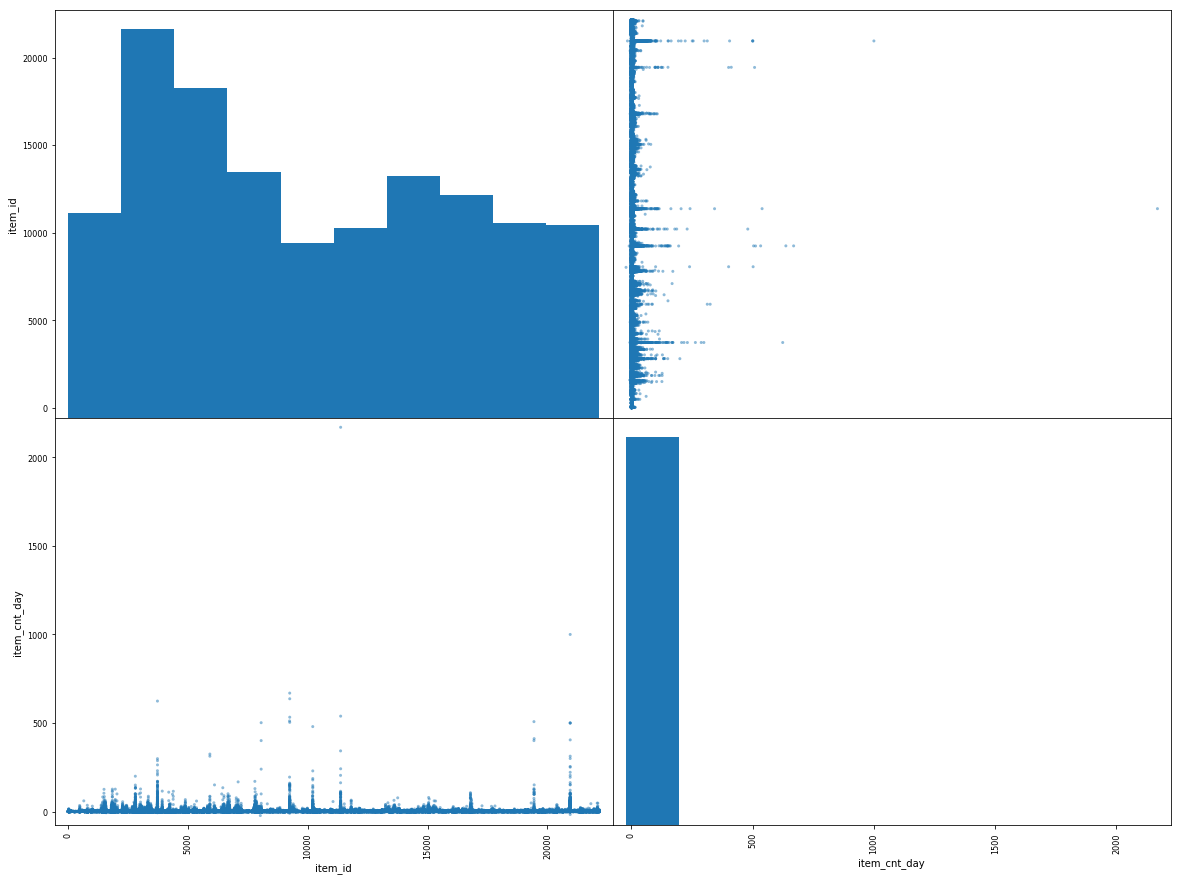

In [18]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
transactions = data_load['sales_train'].copy()
features = ['item_id', 'item_cnt_day']

#price_limit = transactions.item_price.quantile([0.0, 0.999])[0.999]
#prices = transactions['item_price']
#transactions.loc[(prices > price_limit), ['item_price']] = price_limit

#count_limit = transactions.item_cnt_day.quantile([0.0, 0.999])[0.999]
#counts = transactions['item_cnt_day']
#transactions.loc[(counts > count_limit), ['item_cnt_day']] = count_limit

scatter_matrix(transactions[features], figsize=(20,15))
plt.show()

# There are a few products with very different or high prices, and also <20 items with very high number of item_cnt_day

In [19]:
tmp = transactions.groupby(['item_id'], as_index = False).item_price.var(0)
result = tmp.sort_values(['item_price'], ascending = False)
result.head(5)

,item_id,item_price
13913,14170,2.253410e+07
11162,11365,1.690013e+07
13155,13403,1.616183e+07
7822,7982,1.572269e+07
462,475,1.455222e+07


In [20]:
tmp = transactions.groupby(['item_id'], as_index = False).item_cnt_day.var(0)
result = tmp.sort_values(['item_cnt_day'], ascending = False)
result.head(20)

,item_id,item_cnt_day
19123,19437,12253.410468
9063,9248,11245.241602
9064,9249,11054.094061
11170,11373,10918.610615
19131,19445,7542.984375
5809,5917,2708.165679
3652,3730,2605.512465
4306,4392,1950.000000
19132,19446,1896.193906
7897,8057,1825.287122


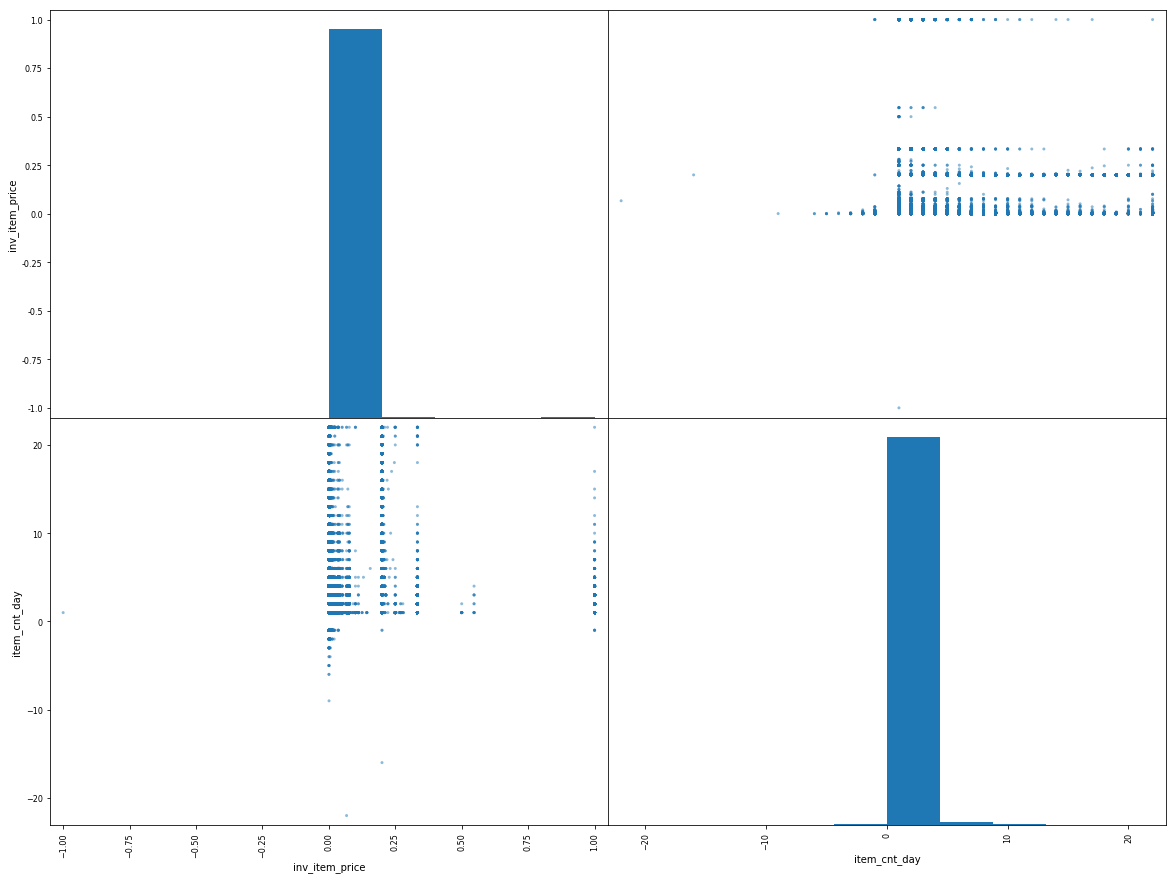

In [21]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
transactions = data_load['sales_train'].copy()
transactions['inv_item_price'] = transactions['item_price'].apply(lambda x:1/x)

features = ['inv_item_price', 'item_cnt_day']

prices = transactions['inv_item_price']
transactions.loc[(prices > 1), ['inv_item_price']] = 1

count_limit = transactions.item_cnt_day.quantile([0.0, 0.999])[0.999]
counts = transactions['item_cnt_day']
transactions.loc[(counts > count_limit), ['item_cnt_day']] = count_limit

scatter_matrix(transactions[features], figsize=(20,15))
plt.show()

# There are a few products with very different or high prices, and also <20 items with very high number of item_cnt_day

In [3]:
crappy_sub = pd.read_csv('../data/sales_sub_20180123b.csv')

In [4]:
crappy_sub.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.012496
std,61834.358168,0.460810
min,0.000000,-0.200000
25%,53549.750000,0.000000
50%,107099.500000,0.000000
75%,160649.250000,0.000000
max,214199.000000,47.140000


In [12]:
crappy_sub[crappy_sub.item_cnt_month > 30]

,ID,item_cnt_month
12787,12787,47.10
41394,41394,47.06
41395,41395,47.02
43387,43387,47.10
46494,46494,47.14
46495,46495,47.08
48487,48487,47.10
53587,53587,47.10
56694,56694,47.06
56695,56695,47.08


In [5]:
last_sub = pd.read_csv('../data/sales_sub_20180127g.csv')

In [6]:
last_sub.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.183983
std,61834.358168,1.296609
min,0.000000,0.000000
25%,53549.750000,0.000000
50%,107099.500000,0.018477
75%,160649.250000,0.135045
max,214199.000000,151.715000


In [13]:
last_sub[last_sub.item_cnt_month > 80]

,ID,item_cnt_month
37341,37341,88.223667
41260,41260,134.739333
46360,46360,151.715000
56560,56560,151.552667
71860,71860,105.958333
102460,102460,149.306667
127960,127960,104.375333
138160,138160,89.985000
158560,158560,81.111667
204460,204460,83.761571
